## Obesity in America 

**PURPOSE** : Understand trends and differences in obesity throughout the United States 

**STEPS:**
+ Data Import & Cleaning
+ Exploratory Data Analysis 
+ Correlations and Conclusions

**AUTHOR** : Maureen Wiebe

**DATA SOURCES**:<br> 
- CDC Obesity Data: https://chronicdata.cdc.gov/Behavioral-Risk-Factors/BRFSS-Table-of-Overweight-and-Obesity-BMI-/fqb7-mgjf/data
- State Health Facts: https://www.kff.org/statedata/
    
**REV DATE**: 2-20-2020

### Importing Packages and Data

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px
pd.set_option('max_columns', None)
pio.renderers.default = "plotly_mimetype+notebook_connected"

### Obesity Data Overview 

The dataset is a summary of the CDC Behavior Risk Survelliance System Survey. The individual responses have been aggregated by state to summarize obesity data based on various categories (see below) each year from 2011-2019. This analysis will focus on understanding the trends at a state level as well as how different economic and demographic groups differ in terms of the rate of obesity. 

In [3]:
obesity = pd.read_csv('Obesity_Data.csv')

In [4]:
with pd.option_context('display.max_colwidth', None):
    display(obesity.groupby(['Break_Out_Category'], as_index=False)['Break_Out'].agg(['unique']))

,unique
Break_Out_Category,
Age Group,"[35-44, 65+, 18-24, 45-54, 55-64, 25-34]"
Education Attained,"[H.S. or G.E.D., Less than H.S., College graduate, Some post-H.S.]"
Gender,"[Female, Male]"
Household Income,"[$15,000-$24,999, Less than $15,000, $25,000-$34,999, $35,000-$49,999, $50,000+]"
Overall,[Overall]
Race/Ethnicity,"[Black, non-Hispanic, Multiracial, non-Hispanic, American Indian or Alaskan Native, non-Hispanic, Other, non-Hispanic, Native Hawaiian or other Pacific Islander, non-Hispanic, Asian, non-Hispanic, White, non-Hispanic, Hispanic]"


In [5]:
obesity.head()

,Year,Locationabbr,Locationdesc,Class,Topic,Question,Response,Break_Out,Break_Out_Category,Sample_Size,Data_value,Confidence_limit_Low,Confidence_limit_High,Display_order,Data_value_unit,Data_value_type,Data_Value_Footnote_Symbol,Data_Value_Footnote,DataSource,ClassId,TopicId,LocationID,BreakoutID,BreakOutCategoryID,QuestionID,ResponseID,GeoLocation
0,2019,AK,Alaska,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Overweight (BMI 25.0-29.9),"Black, non-Hispanic",Race/Ethnicity,22,NaN,NaN,NaN,1,%,Crude Prevalence,*,Prevalence estimate not available if the unwei...,BRFSS,CLASS14,TOPIC09,2,RACE02,CAT4,_BMI5CAT,RESP040,"(64.84507995700051, -147.72205903599973)"
1,2019,AK,Alaska,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Underweight (BMI 12.0-18.4),"Multiracial, non-Hispanic",Race/Ethnicity,2,NaN,NaN,NaN,1,%,Crude Prevalence,*,Prevalence estimate not available if the unwei...,BRFSS,CLASS14,TOPIC09,2,RACE07,CAT4,_BMI5CAT,RESP042,"(64.84507995700051, -147.72205903599973)"
2,2019,AK,Alaska,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),H.S. or G.E.D.,Education Attained,239,27.32,22.50,32.14,1,%,Crude Prevalence,NaN,NaN,BRFSS,CLASS14,TOPIC09,2,EDUCA2,CAT5,_BMI5CAT,RESP039,"(64.84507995700051, -147.72205903599973)"
3,2019,AK,Alaska,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Overweight (BMI 25.0-29.9),35-44,Age Group,151,38.39,31.65,45.13,1,%,Crude Prevalence,NaN,NaN,BRFSS,CLASS14,TOPIC09,2,AGE03,CAT3,_BMI5CAT,RESP040,"(64.84507995700051, -147.72205903599973)"
4,2019,AK,Alaska,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Normal Weight (BMI 18.5-24.9),"$15,000-$24,999",Household Income,95,35.23,25.61,44.85,1,%,Crude Prevalence,NaN,NaN,BRFSS,CLASS14,TOPIC09,2,INCOME2,CAT6,_BMI5CAT,RESP041,"(64.84507995700051, -147.72205903599973)"


In [6]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47074 entries, 0 to 47073
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        47074 non-null  int64  
 1   Locationabbr                47074 non-null  object 
 2   Locationdesc                47074 non-null  object 
 3   Class                       47074 non-null  object 
 4   Topic                       47074 non-null  object 
 5   Question                    47074 non-null  object 
 6   Response                    47074 non-null  object 
 7   Break_Out                   47074 non-null  object 
 8   Break_Out_Category          47074 non-null  object 
 9   Sample_Size                 47074 non-null  object 
 10  Data_value                  38172 non-null  float64
 11  Confidence_limit_Low        38100 non-null  float64
 12  Confidence_limit_High       38100 non-null  float64
 13  Display_order               470

### Data Cleaning for Obesity Data

Updated categorical data to ensure consistent formatting throughout the entire study period and updating text to properly display.  Missing values were also explored to investigate what was missing and why. 

In [7]:
obesity.describe(include =['object', 'float', 'int'] )

,Locationabbr,Locationdesc,Class,Topic,Question,Response,Break_Out,Break_Out_Category,Sample_Size,Data_value,Confidence_limit_Low,Confidence_limit_High,Display_order,Data_value_unit,Data_value_type,Data_Value_Footnote_Symbol,Data_Value_Footnote,DataSource,ClassId,TopicId,BreakoutID,BreakOutCategoryID,QuestionID,ResponseID,GeoLocation
count,47074,47074,47074,47074,47074,47074,47074,47074,47074,38172.000000,38100.000000,38100.000000,47058,47074,47074,8902,8902,47074,47074,47074,47074,47074,47074,47074,47002
unique,56,56,1,1,1,8,26,6,3420,NaN,NaN,NaN,535,1,1,3,3,1,1,2,31,6,1,4,105
top,UT,Maryland,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Normal Weight (BMI 18.5-24.9),Overall,Race/Ethnicity,0,NaN,NaN,NaN,1,%,Crude Prevalence,*,Prevalence estimate not available if the unwei...,BRFSS,CLASS14,TOPIC09,BO1,CAT4,_BMI5CAT,RESP041,"(13.444304, 144.793731)"
freq,888,888,47074,47074,47074,7616,1980,12659,797,NaN,NaN,NaN,27706,47074,47074,8105,8105,47074,47074,27600,1980,12659,47074,11782,886
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.388717,24.380282,32.410106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.423066,11.436806,14.089594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,0.100000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.900000,20.770000,29.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.500000,27.175000,35.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.930000,32.000000,40.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#there is a difference in the capitalization for some of the years for the response feature 
obesity.Response.value_counts()

Normal Weight (BMI 18.5-24.9)    7616
Obese (BMI 30.0 - 99.8)          7616
Overweight (BMI 25.0-29.9)       7615
Underweight (BMI 12.0-18.4)      7563
Overweight (bmi 25.0-29.9)       4166
Normal Weight (bmi 18.5-24.9)    4166
Obese (bmi 30.0 - 99.8)          4166
Underweight (bmi 12.0-18.4)      4166
Name: Response, dtype: int64

In [9]:
#ensure that all responses match 
obesity.loc[obesity.Response=='Obese (bmi 30.0 - 99.8)','Response'] = 'Obese (BMI 30.0 - 99.8)'
obesity.loc[obesity.Response=='Normal Weight (bmi 18.5-24.9)','Response'] = 'Normal Weight (BMI 18.5-24.9)'
obesity.loc[obesity.Response=='Overweight (bmi 25.0-29.9)','Response'] = 'Overweight (BMI 25.0-29.9)'
obesity.loc[obesity.Response=='Underweight (bmi 12.0-18.4)','Response'] = 'Underweight (BMI 12.0-18.4)'

In [10]:
obesity.Response.value_counts()

Normal Weight (BMI 18.5-24.9)    11782
Obese (BMI 30.0 - 99.8)          11782
Overweight (BMI 25.0-29.9)       11781
Underweight (BMI 12.0-18.4)      11729
Name: Response, dtype: int64

In [11]:
obesity[obesity.Break_Out_Category=='Household Income'].Break_Out.value_counts()

$15,000-$24,999      1908
Less than $15,000    1908
$50,000+             1908
$35,000-$49,999      1908
$25,000-$34,999      1908
Name: Break_Out, dtype: int64

In [12]:
#format the response properly
obesity.loc[obesity.Break_Out=='$50,000+','Break_Out'] ='$50K+'
obesity.loc[obesity.Break_Out=='$15,000-$24,999','Break_Out'] ='$15K-$24.9K'
obesity.loc[obesity.Break_Out=='$35,000-$49,999 ','Break_Out'] ='$35K-$49.9K' 
obesity.loc[obesity.Break_Out=='Less than $15,000','Break_Out']='Less than $15K'
obesity.loc[obesity.Break_Out=='$25,000-$34,999','Break_Out'] ='$25K-$34.9K'
obesity.loc[obesity.Break_Out=='$35,000-$49,999','Break_Out'] ='$35K-$49.9K'

In [13]:
obesity[obesity.Break_Out_Category=='Household Income'].Break_Out.value_counts()

Less than $15K    1908
$25K-$34.9K       1908
$50K+             1908
$15K-$24.9K       1908
$35K-$49.9K       1908
Name: Break_Out, dtype: int64

#### Checking for Missing Values 

There is minimal missing information.  The data that is missing for the data value, and uppper/lower confidence values is where the unweighted sample size for the denominator was < 50 or the Relative Standard Error (RSE) is > 0.3 or if the state did not collect data for that calendar year. The missing footnote data is due to no footnote for that particular datapoint. 

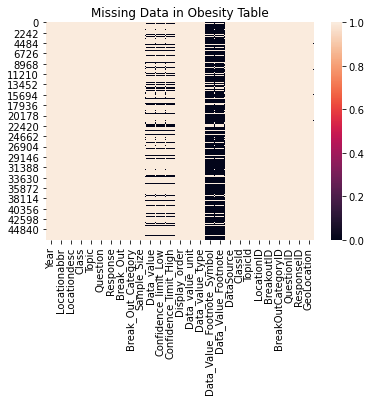

In [14]:
#black lines indicate that the data is missing for that feature and row
sns.heatmap(~obesity.isnull(), xticklabels=True)
plt.title('Missing Data in Obesity Table')
plt.show()

In [15]:
obesity.isnull().sum(axis =0).sort_values(ascending = False)

Data_Value_Footnote           38172
Data_Value_Footnote_Symbol    38172
Confidence_limit_Low           8974
Confidence_limit_High          8974
Data_value                     8902
GeoLocation                      72
Display_order                    16
ClassId                           0
DataSource                        0
Locationabbr                      0
Locationdesc                      0
Class                             0
Topic                             0
Question                          0
Response                          0
Break_Out                         0
Break_Out_Category                0
Sample_Size                       0
QuestionID                        0
BreakOutCategoryID                0
BreakoutID                        0
ResponseID                        0
Data_value_unit                   0
Data_value_type                   0
LocationID                        0
TopicId                           0
Year                              0
dtype: int64

## Overall Obesity in the US from 2011-2019

We'll start by looking at overall obesity across all demographics in the US. Obesity in on the rise in the US, over the course of 9 years the percentage of the US population that is considered obese has increased almost 5% (27.7%-32.4%). 

In [16]:
overall = obesity.loc[obesity.Break_Out_Category =='Overall',['Year','Locationabbr','Locationdesc', 'Response','Data_value']].reset_index(drop=True)

In [17]:
overall['Data_value'] =overall.Data_value.astype(float)

In [18]:
fig = px.line(overall[(overall.Response =='Obese (BMI 30.0 - 99.8)')& (overall.Locationabbr =='US')], x = 'Year', y='Data_value', title ='Obesity in America 2011-2019')
fig.update_layout(xaxis_title ='Year', yaxis_title = 'Percent Obese (%)')
fig.show()

The following two maps show the dramatic rise of obesity across the United States over the course of 8 years. The prevalence of obesity is not consistent across the United States but the upward trend is. 

In [19]:
fig =px.choropleth(overall[(overall.Response =='Obese (BMI 30.0 - 99.8)')& (overall.Year ==2011)], locations ='Locationabbr', locationmode ="USA-states",
                  color ='Data_value', color_continuous_scale ='reds', range_color =(20, 40), scope ='usa')
fig.update_layout(
    title_text='Obesity in America in 2011',
    coloraxis_colorbar={
                     'title':'Percent Obese'
    })
fig.show()

In [20]:
fig =px.choropleth(overall[(overall.Response =='Obese (BMI 30.0 - 99.8)')& (overall.Year ==2019)], locations ='Locationabbr', locationmode ="USA-states",
                  color ='Data_value', color_continuous_scale ='reds', range_color =(20,40), scope ='usa')
fig.update_layout(
    title_text='Obesity in America in 2019',
    coloraxis_colorbar={
                     'title':'Percent Obese'
    })
fig.show()

## Obesity Across the States

Obesity is not equal across the country.  Certain regions have much higher levels of obesity than others.  Particularly the South and the Midwest suffer from the highest levels whereas the prevalence of obesity on the west coast is lower. Although all areas of the country have seen levels of obesity rising in the last decade. 

In [21]:
regions = pd.read_csv('regions.csv')

In [22]:
overall = pd.merge(overall, regions, how='outer', left_on ='Locationabbr',right_on ='State Code')

In [23]:
overall.loc[overall.Locationabbr=='UW','Region'] ='US Overall'

In [24]:
region_obese = pd.DataFrame(pd.pivot_table(data =overall[overall.Response =='Obese (BMI 30.0 - 99.8)'], index =['Year','Region'], values ='Data_value', aggfunc='mean' ).to_records())

In [25]:
fig = px.line(region_obese, x ='Year', y='Data_value', color  ='Region')
fig.update_layout(title ='Obesity by Region', xaxis_title ='Year', yaxis_title = 'Percent Obese (%)')
fig.show()

## State Comparison

In [26]:
fig = px.line(overall[(overall.Locationabbr.isin(['UW','WV','MS', 'AR', 'CO','HI','MA']))&(overall.Response =="Obese (BMI 30.0 - 99.8)")], x='Year',y='Data_value', color ='Locationdesc')
fig.update_layout(title ='Most Obese and Least Obese States', xaxis_title ='Year', yaxis_title = 'Percent Obese (%)')
fig.add_annotation(x=2015, y=39, text ='Most Obese States: AR, MS, WV', showarrow = False)
fig.add_annotation(x=2015, y=32, text ='US Overall', showarrow = False)
fig.add_annotation(x=2015, y=26, text ='Least Obese States: CO, HI, MA', showarrow = False)
fig.show()

### Demographic Differences in Obesity 

Demographic level obesity data from the CDC was only summarized at the state level (no national summary statistics were provided). To understand how the prevelance of obesity changes as we look at different demographic groups we will look at details from two different states Ohio and North Carolina to demostrate the trends seen across the nation. 

#### Gender Differences in Obesity

Over time the percentage of states where more females than males are obese has increased.  In 2019, almost 60% of states had a higher percentage of females that were obese than males that were obese. 

In [27]:
#Create table to compare gender differences in obesity across the states 
gender = pd.DataFrame(obesity[(obesity['Break_Out_Category']=='Gender') &(obesity.Response =="Obese (BMI 30.0 - 99.8)") ].pivot_table(index =['Year','Locationdesc'], columns = 'Break_Out', values ='Data_value').to_records())
gender.loc[gender.Female > gender.Male,'Female_More_Obese'] = 1
gender.loc[gender.Female <= gender.Male,'Female_More_Obese'] = 0

In [28]:
gender_obese = pd.DataFrame((gender.groupby('Year').agg({'Female_More_Obese':'sum'})/53).to_records())

In [29]:
fig = px.bar(gender_obese, x='Year', y='Female_More_Obese')
fig.update_layout(title ='Percent of States Where Obesity Prevalence was Higher in Females', xaxis_title ='Year', 
                  yaxis_title = 'Percentage of All States', width =700 ,height =500)

fig.show()

The two graphs below demostrate how these changes in obesity of each gender have played out across the country.

In [30]:
fig = px.line(obesity[(obesity['Break_Out_Category']=='Gender') & (obesity.Locationabbr.isin(['NC','OH']))&(obesity.Response =="Obese (BMI 30.0 - 99.8)")], x='Year', y='Data_value', color='Break_Out', facet_col='Locationdesc')
fig.update_layout(title ='Gender Differences in Obesity', xaxis_title ='Year', yaxis_title = 'Percent Obese (%)')
fig.show()

#### Obesity Prevelenace Differences Based on Level of Education Attained 

One clear trend is that the prevlance of obesity in college graduates tends to be lower than the prevalence is for the population with less education.  This trend was consistent across all states although the absolute difference in rates varied. 

In [31]:
fig = px.line(obesity[(obesity['Break_Out_Category']=='Education Attained') & (obesity.Locationabbr.isin(['NC','OH']))&(obesity.Response =="Obese (BMI 30.0 - 99.8)")], x='Year', y='Data_value', color='Break_Out', facet_col='Locationdesc',
              category_orders ={'Break_Out':['College graduate','Some post-H.S.','Less than H.S.','H.S. or G.E.D.']})
fig.update_layout(title ='Education Attained and Obesity', xaxis_title ='Year', yaxis_title = 'Percent Obese (%)')
fig.show()

#### Race/Ethnicity Differences in Obesity Prevelenace  

One other trend that was consistently visualized in the data was that the rate of obesity was higher for the black population than for white population (if there was a large enough black population).

In [32]:
fig = px.line(obesity[(obesity['Break_Out_Category']=='Race/Ethnicity') & (obesity.Locationabbr.isin(['NC','OH']))&(obesity.Response =="Obese (BMI 30.0 - 99.8)")&(obesity.BreakoutID.isin(['RACE1','RACE01','RACE2','RACE02','RACE3','RACE08']))], x='Year', y='Data_value', color='Break_Out', facet_col='Locationdesc')
fig.update_layout(title ='Race/Ethnicity Differences in Obesity', xaxis_title ='Year', yaxis_title = 'Percent Obese (%)')
fig.show()

### State Level Demographic Data

To understand which factors are correlated with obesity a table containing State Health Facts compiled by the Kaiser Family Foundation was combined with the obesity data from 2019. These factors will be examined to understand which socioeconomic and health factors correlate with rates of obesity. 

In [33]:
demographics=pd.read_csv('state_demographics.csv')

In [34]:
demographics.head()

,Location,Total_Pop,White,Black,Hispanic,Asian,American Indialaska Native,Native Hawaiian/Other Pacific Islander,Multiple Races,Avg_SNAP_Participants,Avg_SNAP_Perc,PVTY_Under_100%,PVTY_100-199%,PVTY_200-399%,PVTY_400%+,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Life_Expectancy,ACTIVITY_All Adults,Unemployed,Adult_Report_No_Doctor,Adult_Smoking_Perc,Adult_Alcohol_Dependence,Adult_Report_Fair_Poor_Health
0,United States,319249300.0,0.601,0.122,0.185,0.056,0.007,0.002,0.028,"39,651,687",0.12,0.123,0.166,0.296,0.415,0.496,0.059,0.198,0.142,0.014,0.092,78.7,0.74,0.035,0.233,0.15,0.057,0.188
1,Alabama,4767100.0,0.654,0.265,0.044,0.014,0.004,NaN,0.019,"766,681",0.16,0.154,0.201,0.314,0.330,0.472,0.055,0.195,0.160,0.021,0.097,75.5,0.69,0.030,0.227,0.20,0.050,0.227
2,Alaska,701700.0,0.600,0.022,0.070,0.060,0.151,0.015,0.083,"91,995",0.13,0.107,0.137,0.314,0.443,0.484,0.035,0.213,0.100,0.053,0.115,78.8,0.78,0.062,0.319,0.17,0.074,0.155
3,Arizona,7098000.0,0.542,0.043,0.318,0.033,0.039,0.002,0.024,"845,733",0.12,0.134,0.185,0.321,0.360,0.451,0.052,0.210,0.161,0.015,0.111,79.9,0.76,0.049,0.289,0.15,0.057,0.190
4,Arkansas,2922500.0,0.721,0.152,0.078,0.016,0.006,0.004,0.024,"372,451",0.13,0.165,0.228,0.311,0.295,0.420,0.054,0.262,0.159,0.014,0.091,76.0,0.69,0.035,0.211,0.20,0.057,0.252


In [35]:
overall.loc[overall.Locationabbr =='UW','Locationdesc']='United States'

In [36]:
summary_2019 = pd.merge(overall[overall.Year ==2019], demographics, how='outer', left_on ='Locationdesc',right_on ='Location')

In [37]:
correlation = summary_2019[summary_2019.Response =='Obese (BMI 30.0 - 99.8)'].corr()

### Correlation Coefficients 

To understand the relative correlation between the additional socioecomic and health data as it relates to the prevelance of obesity a correlation matrix was created.  The results for the correlations with the prevelance of obesity can be seen below.  There were several factors that had strong positive and negative correlations with obesity. Below we will more closely explore some of these relationships. 

In [38]:
fig = px.bar(correlation.sort_values(by='Data_value'), x='Data_value')
fig.update_layout(title ='Pearson Correlation Coefficent with % Obesity', xaxis_title ='Pearson Correlation Coefficent', 
                 width =800 ,height =1000)

fig.show()

#### Life Expectancy
A rather alarming correlation is the linear model for life expectancy and obesity.  There is a strong correlations that the greater the prevelance of obesity in a population the shorter the life expectancy.  There is difference of 7 years for the life expectancy between states with the shortest and longest life expectancy(75 years vs. 82 years).  The model predicts that for each percentage increase in the prevelance of obesity in the population the life expectancy decreases by about 0.34 years.  

In [39]:
fig = px.scatter(summary_2019[summary_2019.Response =='Obese (BMI 30.0 - 99.8)'],x='Data_value', y='Life_Expectancy', 
                 trendline ='ols', hover_name ='Locationdesc')
fig.update_layout(title ='Life Expectancy vs. Percent Obesity', xaxis_title ='Percent Obese', yaxis_title ='Life Expectancy')
fig.show()
results = px.get_trendline_results(fig)
print(results.px_fit_results.iloc[0].summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     89.11
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           1.32e-12
Time:                        21:29:02   Log-Likelihood:                -71.754
No. Observations:                  51   AIC:                             147.5
Df Residuals:                      49   BIC:                             151.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.6058      1.162     77.126      0.0

### Physical Activity & Smoking

As could be expected as the percentage of the population reports participation in physical activity there is a correlated decrease in the prevelance of obesity in the population. The opposite effect occurs as the percentage of the population that smokes increases. 

In [40]:
fig = px.scatter(summary_2019[summary_2019.Response =='Obese (BMI 30.0 - 99.8)'], x='ACTIVITY_All Adults', y='Data_value', 
                 trendline ='ols', hover_name ='Locationdesc')
fig.update_layout(title ='Percent of Adults that Report Participation in Any Physical Activity vs. Obesity Percentage', yaxis_title ='Percent Obese',
                  xaxis_title ='Percent of Adults that Report Participation in Any Physical Activity')
fig.show()
results = px.get_trendline_results(fig)
print(results.px_fit_results.iloc[0].summary())




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     71.86
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           3.60e-11
Time:                        21:29:02   Log-Likelihood:                -119.01
No. Observations:                  51   AIC:                             242.0
Df Residuals:                      49   BIC:                             245.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.0372      6.264     13.575      0.0

In [41]:
fig = px.scatter(summary_2019[summary_2019.Response =='Obese (BMI 30.0 - 99.8)'],x='Adult_Smoking_Perc', y='Data_value', 
                 trendline ='ols', hover_name ='Locationdesc')
fig.update_layout(title ='Percent Obesity vs. Percentage of Adults who Smoke', yaxis_title ='Percent Obese', xaxis_title ='Percentage of Adults who Smoke')
fig.show()
results = px.get_trendline_results(fig)
print(results.px_fit_results.iloc[0].summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     61.36
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           3.01e-10
Time:                        21:29:02   Log-Likelihood:                -123.50
No. Observations:                  52   AIC:                             251.0
Df Residuals:                      50   BIC:                             254.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.9958      1.829      9.839      0.0

### Poverty 
The next two visualizations show the relationship of obesity as income levels change. The visual showing the relationship for the population with income >400% of the poverty level we see lower prevelance of obesity. However, the second visual shows the relationships for obesity with lower levels of income.  Those graphs all show that as the population level of poverty decreases the level of obesity increases.  

In [42]:
fig = px.scatter(summary_2019[(summary_2019.Response =='Obese (BMI 30.0 - 99.8)') & ~(summary_2019.Locationabbr.isin(['PR']))],x='PVTY_400%+', y='Data_value',  
                 trendline ='ols', hover_name ='Locationdesc')
fig.update_layout(title ='Percent Obesity vs. Percent of Population above 400% of Poverty Threshold', yaxis_title ='Percent Obese', xaxis_title ='Percent of Population above 400% of Poverty Threshold ($20,578)')
fig.show()
results = px.get_trendline_results(fig)
print(results.px_fit_results.iloc[0].summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     37.82
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           1.37e-07
Time:                        21:29:02   Log-Likelihood:                -127.44
No. Observations:                  51   AIC:                             258.9
Df Residuals:                      49   BIC:                             262.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.9109      2.457     19.091      0.0

In [43]:
poverty = summary_2019.loc[summary_2019.Response =='Obese (BMI 30.0 - 99.8)',['Locationabbr', 'Locationdesc','Response', 'Data_value','PVTY_Under_100%','PVTY_100-199%', 'PVTY_200-399%', 'PVTY_400%+']]

In [44]:
melt = pd.melt(poverty,id_vars =['Locationabbr', 'Locationdesc','Response', 'Data_value'], value_vars = ['PVTY_Under_100%','PVTY_100-199%', 'PVTY_200-399%', 'PVTY_400%+'], var_name ='Income Level', value_name ='Percent of Population')

In [45]:
fig = px.scatter(melt[(melt['Income Level'] !='PVTY_400%+') & (melt.Locationabbr !='PR')],x='Percent of Population', y='Data_value', color ='Income Level',
                 trendline ='ols', hover_name ='Locationdesc')
fig.update_layout(title ='Percent Obesity vs. Income Level', yaxis_title ='Percent Obese', xaxis_title ='Percent of Population at Income Level')
fig.show()
results = px.get_trendline_results(fig)
print(results.px_fit_results.iloc[0].summary())
print(results.px_fit_results.iloc[1].summary())
print(results.px_fit_results.iloc[2].summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     21.10
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           3.07e-05
Time:                        21:29:03   Log-Likelihood:                -132.90
No. Observations:                  51   AIC:                             269.8
Df Residuals:                      49   BIC:                             273.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.7537      2.284      9.525      0.0

### Unisured 

One of the features that I expected to see higher correlation had to do with having insurance. My hypothesis was that not having insurance would have a higher correlation with obesity because the uninsured population would have less contact with health care professionals. Although this relationship was present the signal was weak compared to other features that were considered. 

In [46]:
fig = px.scatter(summary_2019[(summary_2019.Response =='Obese (BMI 30.0 - 99.8)')],x='Uninsured', y='Data_value',  
                 trendline ='ols', hover_name ='Locationdesc')
fig.update_layout(title ='Percent Obesity vs. Percent of Population Uninsured', yaxis_title ='Percent Obese', xaxis_title ='Percent of Population Uninsured')
fig.show()
results = px.get_trendline_results(fig)
print(results.px_fit_results.iloc[0].summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     6.553
Date:                Thu, 18 Mar 2021   Prob (F-statistic):             0.0135
Time:                        21:29:03   Log-Likelihood:                -141.11
No. Observations:                  52   AIC:                             286.2
Df Residuals:                      50   BIC:                             290.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.3996      1.509     18.815      0.0